In [213]:
import psycopg2
import pandas as pd
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
import unicodedata
import string
import numpy as np

In [214]:
def retrieve_reviews(product):
    conn = psycopg2.connect(dbname='product_reviews', user='postgres', password='', host='localhost')
    cursor = conn.cursor()
    p_no = 0
    r_no = 0
    cursor.execute("select * from reviews where product_name = '{}'".format(product))
    rows = cursor.fetchall()
    df = pd.DataFrame(rows)
    cursor.close()
    conn.close()
    return df

In [215]:
df = retrieve_reviews('LG Electronics 65UJ6300 65-Inch 4K Ultra HD Smart LED TV (2017 Model)')

In [216]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,1,LG Electronics 65UJ6300 65-Inch 4K Ultra HD Sm...,https://www.amazon.com/LG-Electronics-65UJ6300...,1,1,5.0 out of 5 stars,"September 22, 2017",Prime Customer,"TV Great, TruMotion Bad!",Now that I found the TruMotion setting so that...,Verified Purchase Helpful No...
1,2,LG Electronics 65UJ6300 65-Inch 4K Ultra HD Sm...,https://www.amazon.com/LG-Electronics-65UJ6300...,1,2,5.0 out of 5 stars,"December 30, 2017",GMC,Hint: Turn OFF Smart Picture Mode,Hint: Turn off Smart Picture Mode and then tur...,Verified Purchase Helpful No...


In [217]:
columns = ['id','p_name','url','p_no','r_no','r_stars','r_date','r_name','r_title','r_text','r_comments']

In [218]:
df.columns = columns

In [219]:
df.head(2)

,id,p_name,url,p_no,r_no,r_stars,r_date,r_name,r_title,r_text,r_comments
0,1,LG Electronics 65UJ6300 65-Inch 4K Ultra HD Sm...,https://www.amazon.com/LG-Electronics-65UJ6300...,1,1,5.0 out of 5 stars,"September 22, 2017",Prime Customer,"TV Great, TruMotion Bad!",Now that I found the TruMotion setting so that...,Verified Purchase Helpful No...
1,2,LG Electronics 65UJ6300 65-Inch 4K Ultra HD Sm...,https://www.amazon.com/LG-Electronics-65UJ6300...,1,2,5.0 out of 5 stars,"December 30, 2017",GMC,Hint: Turn OFF Smart Picture Mode,Hint: Turn off Smart Picture Mode and then tur...,Verified Purchase Helpful No...


In [220]:
df.groupby(['r_stars']).count()

,id,p_name,url,p_no,r_no,r_date,r_name,r_title,r_text,r_comments
r_stars,,,,,,,,,,
1.0 out of 5 stars,78,78,78,78,78,78,78,78,78,78
2.0 out of 5 stars,25,25,25,25,25,25,25,25,25,25
3.0 out of 5 stars,41,41,41,41,41,41,41,41,41,41
4.0 out of 5 stars,73,73,73,73,73,73,73,73,73,73
5.0 out of 5 stars,257,257,257,257,257,257,257,257,257,257


In [39]:
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii

nltk.download('punkt')
nltk.download('wordnet')
stopwords_ = set(stopwords.words('english'))

punctuation_ = set(string.punctuation)

def filter_tokens(sent):
    return([w for w in sent if not w in stopwords_ and not w in punctuation_])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bhaskarballapragada/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bhaskarballapragada/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
documents = []
for row in df[df['r_stars'] == '5.0 out of 5 stars'].iterrows():
    documents.append(remove_accents(''.join(row[1]['r_text']).lower().strip()).decode('utf-8'))

In [70]:
len(documents)

257

In [494]:
wordnet = WordNetLemmatizer()
list_of_wordnet_tokens = []

for i, document in enumerate(documents):
    tokens = nltk.word_tokenize(document)
    tokens_filtered = filter_tokens(tokens)
    tokens_wordnet = [''.join(list(map(wordnet.lemmatize, sent))) for sent in tokens_filtered]
    list_of_wordnet_tokens.append(tokens_wordnet)

In [73]:
list_of_wordnet_tokens

[['found',
  'trumotion',
  'setting',
  'could',
  'turn',
  'really',
  'like',
  'tv',
  'took',
  'awhile',
  'find',
  'right',
  'settings',
  'didnt',
  'look',
  'washed',
  'energy',
  'saver',
  'mode',
  'causing',
  'problems',
  'trumotion',
  'setting',
  'makes',
  '24fps',
  'movies',
  'look',
  'like',
  '30fps',
  'home',
  'movies',
  'otherwise',
  'known',
  '``',
  'soap',
  'opera',
  'effect',
  "''",
  'watched',
  'braveheart',
  'awful',
  'spent',
  'movie',
  'looking',
  'settings',
  'trying',
  'find',
  'picture',
  'options'],
 ['hint',
  'turn',
  'smart',
  'picture',
  'mode',
  'turn',
  'energy',
  'saver',
  'smart',
  'picture',
  'mode',
  'access',
  'energy',
  'saver',
  'setting',
  'picture',
  'dull',
  'drab',
  'energy',
  'saver',
  'reduces',
  'backlight',
  'save',
  'energy',
  'cost',
  'poor',
  'picture',
  'quality',
  'making',
  'change',
  'tv',
  'picture',
  'bright',
  'sharp',
  'great',
  'detail'],
 ['needed',
  'upgr

In [75]:
bow_wordnet_set = set(sum(list_of_wordnet_tokens,[]))
from collections import Counter
vocab_c = Counter(bow_wordnet_set)
vocab = {}
for i, k in enumerate (bow_wordnet_set):
    vocab[k] = i

In [77]:
doc_freq = np.zeros(len(vocab))
vec = np.empty(len(list_of_wordnet_tokens)*len(vocab)).reshape(len(list_of_wordnet_tokens),len(vocab))
for i, tokens in enumerate (list_of_wordnet_tokens):
    for token in tokens:
        index = vocab.get(token)
        vec[i, index] = vec[i, index] + 1

doc_freq = np.sum(vec > 0, axis = 0)

In [79]:
vocab

{'tech': 0,
 'walmart': 1,
 'useless': 2,
 'lightweight': 3,
 'expected': 4,
 'wi-fi': 5,
 'hooking': 6,
 'pointed': 7,
 'detect': 8,
 'fabulous': 9,
 'information': 10,
 'due': 11,
 'apps': 12,
 '43': 13,
 'loved': 14,
 'graphics': 15,
 'ps': 16,
 'yes.would': 17,
 'reasonably': 18,
 'engaged': 19,
 'motion': 20,
 'gets': 21,
 'paid': 22,
 'family': 23,
 'led': 24,
 'indicated': 25,
 'seen': 26,
 'refurbished': 27,
 'damage': 28,
 'become': 29,
 'i.': 30,
 '50': 31,
 'may': 32,
 'panel': 33,
 'monsters': 34,
 'menus': 35,
 'clear': 36,
 'soap': 37,
 'week': 38,
 'money': 39,
 'talks': 40,
 'connection': 41,
 'blow': 42,
 'fault': 43,
 'trigger': 44,
 'input': 45,
 'want': 46,
 'second': 47,
 'stream': 48,
 'normal': 49,
 'asian': 50,
 'ways': 51,
 'costs': 52,
 'gave': 53,
 'ez-pezie': 54,
 '32in': 55,
 'certainly': 56,
 'best.bought': 57,
 'smh': 58,
 'detail': 59,
 'spoken': 60,
 'integration/easier': 61,
 'thank': 62,
 '60p': 63,
 'brands': 64,
 '4th': 65,
 'big': 66,
 'lighting': 

In [495]:
df_new = df.copy()
df_new = df_new[df_new['r_stars'].apply(lambda x: x in ['1.0 out of 5 stars'])]

In [496]:
df_new['rating'] = df_new['r_stars'].apply(lambda x: 1 if x == '5.0 out of 5 stars' else 0)

In [497]:
df_new = df_new[['rating','r_name','r_text']]

In [488]:
df_new.head(3)

,rating,r_name,r_text
49,0,Unbox914,WiFi connection on one of the tvs are having i...
62,0,Stephen,The scrubbing rate amongst other things are no...
84,0,Marilynn Murray,played for 4 days then stopped working


In [103]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [498]:
tfidf = TfidfVectorizer(stop_words='english',max_features=20000, ngram_range=(2,2))
X_descr_vectors = tfidf.fit_transform(df_new['r_text'])
feature_names = np.array(tfidf.get_feature_names())

In [499]:
X_descr_vectors.shape, len(feature_names)

((78, 1609), 1609)

Text(0,0.5,'Reconstruction Errror')

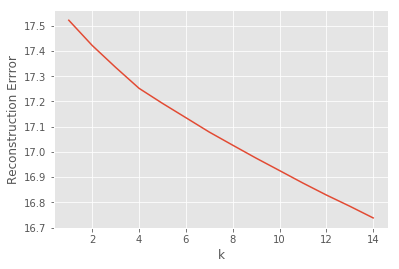

In [490]:
# Compute NMF
from sklearn.decomposition import NMF

def fit_nmf(X, k):
    nmf = NMF(n_components=k)
    nmf.fit(X)
    W = nmf.transform(X);
    H = nmf.components_;
    return nmf.reconstruction_err_

error = [fit_nmf(X_descr_vectors, i) for i in range(1,15)]
plt.plot(range(1,15), error)
plt.xlabel('k')
plt.ylabel('Reconstruction Errror')

In [500]:
# Fit using 3 hidden concepts
nmf = NMF(n_components=15)
nmf.fit(X_descr_vectors)
W = nmf.transform(X_descr_vectors);
H = nmf.components_;
print ('RSS = %.4f' % nmf.reconstruction_err_)

RSS = 7.6641


In [481]:
list(df_new['r_name'].values)

['Prime Customer',
 'GMC',
 'AncientGhost',
 'SJG',
 'Fernando Alvarez',
 'M. Bernson',
 'J M Grappone',
 'ICNI',
 'Jada',
 'Sergey',
 'Pinkie',
 'Zam guy',
 'Zachery Wolfinger',
 'T.P.',
 'Amazon Customer',
 'Agent',
 'josh',
 'OldReno',
 'Texan James',
 'J. Alabi',
 'Rob Russo',
 'NLS',
 'Happy Donis',
 'Jim L.',
 'Michael Andrews',
 'Greg Carlson',
 'F. Childers',
 'Nana',
 'Aksel s',
 'Mr. Bear',
 'Larisa',
 'S. Reigel',
 'Unbox914',
 'pocheting',
 'mhoelzer2988',
 'Rocky Mortensen',
 'Koonel',
 'subway buff',
 'theresa p',
 'Stephen',
 'Haze1092',
 'Alison',
 'craig cordell',
 'Larry basile',
 'Aquapod Bottle Launcher',
 'MR M P CUTLER',
 'Michael B.',
 'Jason Townsend',
 'Jay F',
 'Winnie Litten',
 'Deseree Jean Shuler',
 'Ash',
 'Justin H.',
 'DK',
 'Marilynn Murray',
 'AG',
 'D Novice',
 'Kayla',
 'LoLo',
 'Oldgriz',
 'Dj fidel',
 'bananarock7',
 'The Melba',
 'SIOBLOOM',
 'fph',
 'House',
 'Insain1',
 'Anthony D.',
 'Roger Gifford',
 'Christian Altamura',
 'leslie Peterson',
 

In [501]:
# Make interpretable
words = feature_names
users = list(df_new['r_name'].values)

W, H = (np.around(x,2) for x in (W,H))
W = pd.DataFrame(W,index=users)
H = pd.DataFrame(H,columns=words)


In [409]:
print (W)

                        0     1     2     3     4
Unbox914             0.13  0.00  0.00  0.13  0.00
Stephen              0.12  0.02  0.00  0.00  0.02
Marilynn Murray      0.00  0.00  0.00  0.79  0.00
Dj fidel             0.07  0.00  0.01  0.00  0.01
Amazon Customer      0.00  0.00  0.09  0.35  0.00
Gerri Ayers          0.03  0.00  0.00  0.01  0.44
Robert James         0.00  0.71  0.00  0.00  0.00
Natalie Canter       0.21  0.04  0.00  0.08  0.00
Amazon Kunde         0.06  0.00  0.00  0.00  0.01
casey morgan         0.09  0.00  0.00  0.00  0.00
Justice McCann       0.17  0.15  0.08  0.00  0.00
jeep_cs              0.16  0.00  0.00  0.00  0.00
Amazon Customer      0.03  0.00  0.00  0.00  0.05
John You             0.00  0.41  0.00  0.00  0.00
T. Frank             0.07  0.04  0.00  0.00  0.01
James                0.26  0.01  0.00  0.00  0.03
Sandy                0.20  0.04  0.09  0.00  0.03
Plo                  0.00  0.00  0.00  0.00  0.38
Wiz3223              0.10  0.00  0.00  0.00  0.01


In [466]:
df_new[['r_name','rating']]

,r_name,rating
0,Prime Customer,1
1,GMC,1
2,AncientGhost,1
3,SJG,1
5,Fernando Alvarez,1
6,M. Bernson,1
7,J M Grappone,1
9,ICNI,1
10,Jada,1
14,Sergey,1


In [467]:
print(np.sort(H.iloc[0])[-1])

2.17


In [502]:
print(H.iloc[:,[np.argsort(H.iloc[3])[-6]]])

    wasted time
0          0.00
1          0.00
2          0.00
3          0.18
4          0.00
5          0.00
6          0.00
7          0.00
8          0.00
9          0.00
10         0.00
11         0.00
12         0.00
13         0.00
14         0.00


In [469]:
H.columns[np.argsort(H.iloc[3])[-6]]

'cheap'

In [449]:
H.columns[828]

Index(['went'], dtype='object')

In [503]:
for i in range(15):
    print (H.columns[np.argsort(H.iloc[i])[-6:-1]])

Index(['credit tv', 'screen need', 'screen picture', 'ordered arrived',
       'arrived broken'],
      dtype='object')
Index(['hockey puck', 'days stopped', 'working days', 'tv stopped',
       'played days'],
      dtype='object')
Index(['center screen', 'worked advertised', 'product came', 'specs know',
       'returned refund'],
      dtype='object')
Index(['wasted time', 'dont agree', 'tv smart', 'tv lg', 'lg smart'], dtype='object')
Index(['item opened', 'bought item', 'opened screen', 'took package',
       'package plugged'],
      dtype='object')
Index(['tv dead', 'dead arrival', 'smashed totally', 'delivered damaged',
       'damaged screen'],
      dtype='object')
Index(['buying online', 'box white', 'just opened', 'lines screen',
       'white lines'],
      dtype='object')
Index(['failed acknowledge', 'motherboard issues', 'tv motherboard',
       'issues tv', 'dont buy'],
      dtype='object')
Index(['deteriorating quickly', 'difficult unpleasant', 'busted looked',
      